# Stochastic Multi-Armed Bandits - Bayesian Belief
Using a Bayesian approach to solve the Multi-Armed Bandit problem

In [1]:
%matplotlib inline
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import bandits as bd

We want to use the power of conjugate priors and Thompson Sampling to easily update our belief about the true action value for each arm. In this scenario, we have 10 Bernoulli bandits, where each arm has a random chance p of rewarding us with 1 and a )1-p) chance of rewarding 0. 

In [4]:
n_arms = 10
n_trials = 1000
n_experiments = 500
bandit = bd.BernoulliBandit(n_arms, t=3*n_trials)  # cache samples ahead of time for speed

## Thompson Sampling
Our belief about the value of p for each Bernoulli arm is modeled by a Beta distribution with parameters alpha (number of observed hits) and beta (number of observed misses). We start with alpha = beta = 1 which gives us a uniform prior. As we observe hits (reward = 1) and misses (reward = 0) from selecting arms, we update our alpha and beta parameters accordingly.

Thompson Sampling (TS) randomly samples from the posterior distribution for each arm to get its estimated value. The max of these is then chosen in a greedy fashion as the arm to pull. TS inherently balances exploration and exploitation as the random sampling always could choose any arm, but as more rewards are observed, the best arm will be chosen with higher and higher probability.

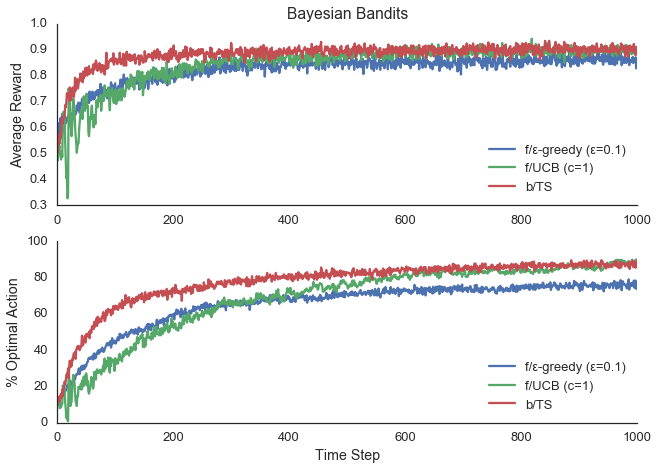

In [5]:
agents = [
    bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.1)),
    bd.Agent(bandit, bd.UCBPolicy(1)),
    bd.BetaAgent(bandit, bd.GreedyPolicy())
]
env = bd.Environment(bandit, agents, label='Bayesian Bandits')
scores, optimal = env.run(n_trials, n_experiments)
env.plot_results(scores, optimal)

## Bernoulli vs. Binomial 
The above example uses models arms that are effectively biased coin flips. The Bernoulli distribution is a special case of the Binomial distribution, where instead of observing the outcome of single coin flip, we observe the number of positive outcomes over N flips.

In this case, the Beta Agent with TS still outperforms the frequentist models, but has less of an advantage over the UCB1 policy in the long run.

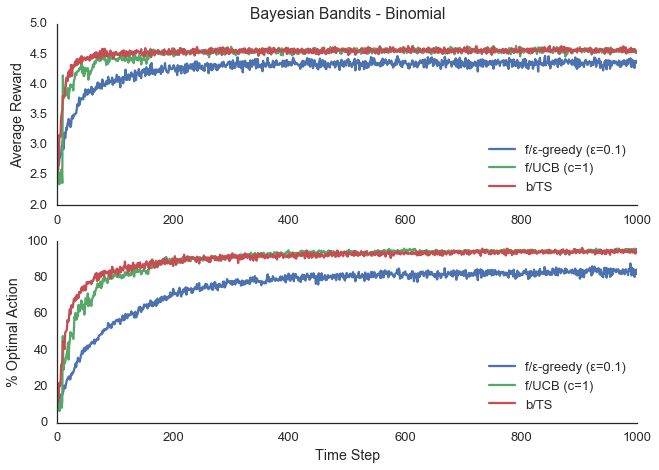

In [11]:
bandit = bd.BinomialBandit(n_arms, n=5, t=3*n_trials)  # cache samples ahead of time for speed
agents = [
    bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.1)),
    bd.Agent(bandit, bd.UCBPolicy(1)),
    bd.BetaAgent(bandit, bd.GreedyPolicy())
]
env = bd.Environment(bandit, agents, label='Bayesian Bandits - Binomial')
scores, optimal = env.run(n_trials, n_experiments)
env.plot_results(scores, optimal)